# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [21]:
from IPython.display import display
import pandas as pd
import datetime as dt
before = pd.read_csv("Before_Covid(2).csv")
during = pd.read_csv("During_Covid(4).csv")
after = pd.read_csv("After_Covid(2).csv")

before['Covid'] = 'before'
during['Covid'] = 'during'
after['Covid'] = 'after'

df = pd.merge(before, after, how = 'outer')
df = pd.merge(df, during, how = 'outer')

df['Source'] = df.apply(lambda x: x['Source'][11:18], axis=1)
df['Date'] = pd.to_datetime(df['Source'], format='%Y-%m')
df.drop('Source', axis=1, inplace=True)
df.drop('open_time', axis=1, inplace=True)
df.drop('close_time', axis=1, inplace=True)
df.drop('taker_buy_quote_volume', axis=1, inplace=True)
df.drop('taker_buy_base_volume', axis=1, inplace=True)
df.drop('quote_volume', axis=1, inplace=True)
df['middle'] = (df['high'] + df['low']) /2
df = df.iloc[:, [7, 0, 1, 8, 2, 3, 4, 5, 6]]
df.drop_duplicates(['Date', 'open', 'high', 'middle', 'low', 'close', 'volume', 'count'], inplace=True)
df.dropna(inplace=True)
df

,Date,open,high,middle,low,close,volume,count,Covid
0,2019-09-01,9930.13,9930.13,9930.130,9930.13,9930.13,0.001000,1,before
1,2019-09-01,9637.93,9665.05,8830.750,7996.45,8519.67,202.350799,2345,before
2,2019-09-01,8528.12,8724.77,8486.275,8247.78,8435.28,55.417971,763,before
3,2019-09-01,8434.45,8453.20,8107.535,7761.87,8064.41,41.880079,1023,before
4,2019-09-01,8078.75,8259.96,8059.270,7858.58,8178.73,47.142904,990,before
...,...,...,...,...,...,...,...,...,...
1921,2024-10-01,67085.03,68193.22,67558.300,66923.38,67900.00,12.826630,2247,after
1922,2024-10-01,67900.00,70000.00,68801.405,67602.81,69903.53,48.189690,6718,after
1923,2024-10-01,69721.94,73272.49,71457.190,69641.89,72671.11,92.319670,10826,after
1924,2024-10-01,72645.72,72910.61,72175.660,71440.71,72475.12,32.534860,4538,after


### Heatmap:


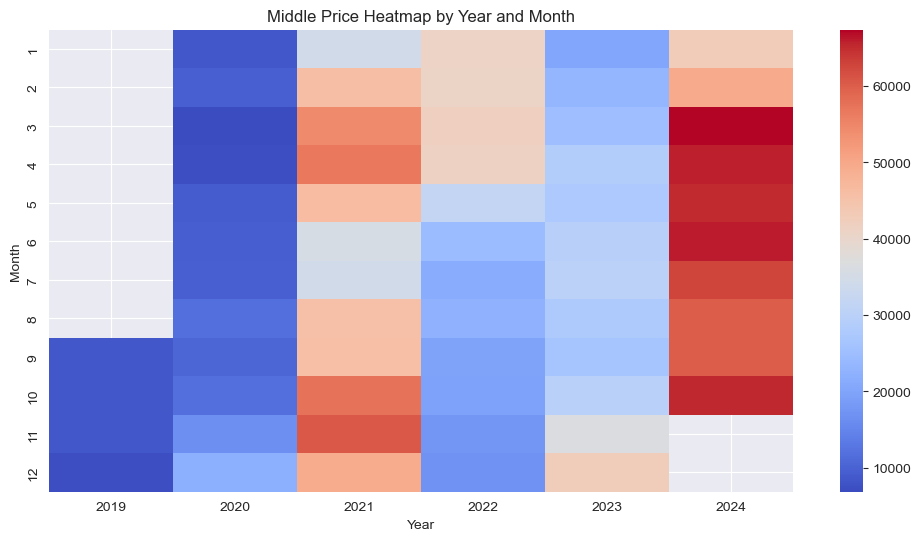

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract year and month from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Pivot the data to create a matrix suitable for heatmap
heatmap_data = df.pivot_table(values='middle', index='month', columns='year')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Middle Price Heatmap by Year and Month")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In [23]:

df.sort_values(by='Date', inplace=True)
df['Bucket'] = df['Date'].dt.to_period('Q')
df.set_index(['Bucket', 'Date'], inplace=True)
df

open      high     middle       low     close  \
Bucket Date                                                            
2019Q3 2019-09-01   9930.13   9930.13   9930.130   9930.13   9930.13   
       2019-09-01   9637.93   9665.05   8830.750   7996.45   8519.67   
       2019-09-01   8528.12   8724.77   8486.275   8247.78   8435.28   
       2019-09-01   8434.45   8453.20   8107.535   7761.87   8064.41   
       2019-09-01   8078.75   8259.96   8059.270   7858.58   8178.73   
...                     ...       ...        ...       ...       ...   
2024Q4 2024-10-01  60974.39  62318.65  61159.325  60000.00  60630.70   
       2024-10-01  63292.04  64077.58  62296.750  60515.92  60999.49   
       2024-10-01  72645.72  72910.61  72175.660  71440.71  72475.12   
       2024-10-01  66111.08  67754.48  66302.955  64851.43  67050.80   
       2024-10-01  72472.22  72643.28  71221.640  69800.00  70395.71   

                       volume  count   Covid  year  month  
Bucket Date                                                
2019Q3 2019-09-01    0.001000      1  before  2019      9  
       2019-09-01  202.350799   2345  before  2019      9  
       2019-09-01   55.417971    763  before  2019      9  
       2019-09-01   41.880079   1023  before  2019      9  
       2019-09-01   47.142904    990  before  2019      9  
...                       ...    ...     ...   ...    ...  
2024Q4 2024-10-01   25.062640   4956   after  2024     10  
       2024-10-01   48.543060   6164   after  2024     10  
       2024-10-01   32.534860   4538   after  2024     10  
       2024-10-01   38.566130   7059   after  2024     10  
       2024-10-01   28.095720   2912   after  2024     10  

[1865 rows x 10 columns]